# Librairie

In [1]:
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import KeyedVectors

/Users/lilianvalin/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Import dataset GloVe

In [2]:
path = kagglehub.dataset_download("danielwillgeorge/glove6b100dtxt")

# Functions

In [3]:
def load_glove_model(glove_file_path):
    print("Loading Glove Model...")
    glove_model = {}
    with open(glove_file_path, 'r', encoding="utf8") as f:
        for line in f:
            parts = line.split()
            word = parts[0]
            vector = np.array(parts[1:], dtype='float32')
            glove_model[word] = vector
    print(f"{len(glove_model)} words loaded!")
    return glove_model

# Example

In [6]:
glove_file_path = path + '/glove.6B.100d.txt'
glove_model = load_glove_model(glove_file_path)

# Liste des mots pour visualiser les relations
words = ["king", "queen", "man", "woman", "paris", "france", "rome", "italy"]

# Extraire les vecteurs pour chaque mot
word_vectors = np.array([glove_model[word] for word in words])
word_labels = words

# Réduction de dimension avec PCA pour visualiser en 2D
pca = PCA(n_components=3)
word_vectors_2d = pca.fit_transform(word_vectors)

Loading Glove Model...
400000 words loaded!


## Affichage

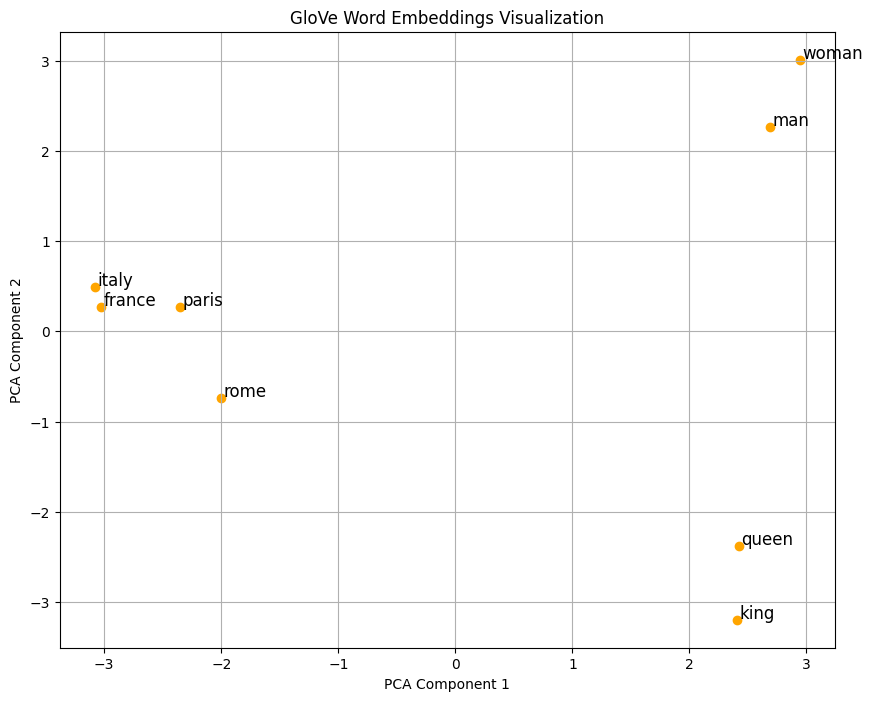

In [7]:
# Visualisation
plt.figure(figsize=(10, 8))
for i, word in enumerate(word_labels):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], marker='o', color='orange')
    plt.text(word_vectors_2d[i, 0] + 0.02, word_vectors_2d[i, 1] + 0.02, word, fontsize=12)
plt.title("GloVe Word Embeddings Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()